MCMC Algorithm Tutorial
=======================

Introduction
------------

This notebook serves as a basic tutorial to using the MCMC_tools.py file and its MCMC class. The tutorial will walk through running a single MCMC, and displaying results using built into functions. *Craig Allen, 8-2-2024*

Begin with importing the MCMC_tools.py file. This is a good check to make sure all required packages are installed, especially scipy and multiprocessing. You may need to make sure RAS_ODE_models_MCMC has the correct path (see error if thrown).

In [1]:
from MCMC_tools import *

Setup
-----

First we set up our list of Parameter objects, which tells the MCMC which parameters we wish to sample. Each Parameter object includes a string label that can optionally be Latex formatted for graphing. An exact string id must be provided along with a type string of 'kinetic' or 'iv'. We also construct a dict of initial parameter values to be used when we run the MCMC. These should coorspond to the rule_functions designed in the rule_functions.py file

In [6]:
q_std = 0.1 # sets the proposal standard deviation to 10^0.1.
std = 0.1   # sets each Parameter standard deviation to 10^0.1. Can be changed in each parameter for accuracy to experiments.

kint =      Parameter('$k_{hyd}$',    'kint',   'kinetic',  3.5e-4,     std, q_std)
kdissD =    Parameter('$k_{d,GDP}$',  'kdissD', 'kinetic',  1.1e-4,     std, q_std)
kdissT =    Parameter('$k_{d,GTP}$',  'kdissT', 'kinetic',  2.5e-4,     std, q_std)
kassD =     Parameter('$k_{a,GDP}$',  'kassD',  'kinetic',  2.3e6,      std, q_std)
kcat =      Parameter('$k_{cat,GAP}$','kcat',   'kinetic',  5.4,        std, q_std)
Km =        Parameter('$K_{M,GAP}$',  'Km',     'kinetic',  .23e-6/250, std, q_std)
kD =        Parameter('$k_{cat,GDP}$','kD',     'kinetic',  3.9,        std, q_std)
KmD =       Parameter('$K_{M,GDP}$',  'KmD',    'kinetic',  3.86e-4/250,std, q_std)
KmT =       Parameter('$K_{M,GTP}$',  'KmT',    'kinetic',  3e-4/250,   std, q_std)
Kd =        Parameter('$K_{D,Eff}$',  'Kd',     'kinetic',  80e-9,      std, q_std)

params = [kint,kdissD,kdissT,kassD,kcat,Km,kD,KmD,KmT,Kd]

#Including state variables is also allowed. It is important they have an accurate ID and type (e.g. 'GAP' and 'iv) so the MCMC knows how to vary them correctly.
#Eff = Parameter('Effector','EffTot','iv',4e-7,0.005,0.005,bound_mults=[0.1,10])
#GAP = Parameter('GAP','GAP','iv',(6e-11),0.005,0.005,bound_mults=[0.1,10])
#GEF = Parameter('GEF','GEF','iv',(2e-10),0.005,0.005,bound_mults=[0.1,10])
#params = [kint,kdissD,kdissT,kassD,kcat,Km,kD,KmD,KmT,Kd,Eff,GAP,GEF]

# Initial parameter values. Set at prior means, but could be set as something else.
o_0 = {}
for param in params:
    o_0[param.id] = param.prior_mu

Next we can provide lists of rules and their relevent thresholds. The MCMC has the rules from rule_function.py by default, but we import it and change the lists as an example. Notice we never actually import anything about RAS. The rule_functions file handles anything to do with RAS itself, keeping the MCMC_tools.py independent of actual model / rules.

In [3]:
from rule_functions import *
rule_funcs = [rule_hypersens,rule_half_NF1_KO,rule_full_NF1_KO,rule_GAP_insens,rule_GTPase_decrease,rule_GTPase_dec_comb,rule_fast_cycling]
upper_thresholds = [None,None,None,None,11,None,None]
lower_thresholds = [0.09920443738680824*(0.5),100+0.5*(215.62967601111103-100),100+0.5*(215.62967601111103-100),50,None,0.5*29.292937875056282,0.5*59.439713008530475]

Now we can initialize and setup our MCMC object.

In [4]:
# MCMC intitialization
MCMC_example = MCMC(params) 

# Settings setup
MCMC_example.save = False               # prevents saving data for sake of example
MCMC_example.liklihood_type = 'STRICT'  # sets the likelihood curve type to strict
MCMC_example.prior_lb = 1               # sets the prior plateau to 1

Running MCMC
------------

Finally we can run the MCMC.

In [5]:
n_steps = 100

S, S_all,rules_passed_all,rules_passed_accepted,vals_accepted = MCMC_example.run_MCMC(n_steps,o_0,id='example')
#excuse the long list of outputs... in future could change to large data class.

Running MCMC...: 100%|██████████| 120/120 [00:29<00:00,  4.04it/s]


Analysis
--------

Now that we ran the MCMC, we can analyze the data using its built in functions.

First lets look at a basic trace plot of the parameters over time.

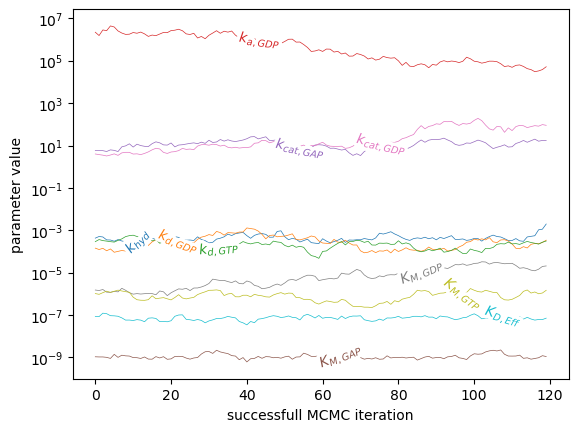

In [ ]:
MCMC_example.trace_plot()

Now lets look at a parameter pairplot.

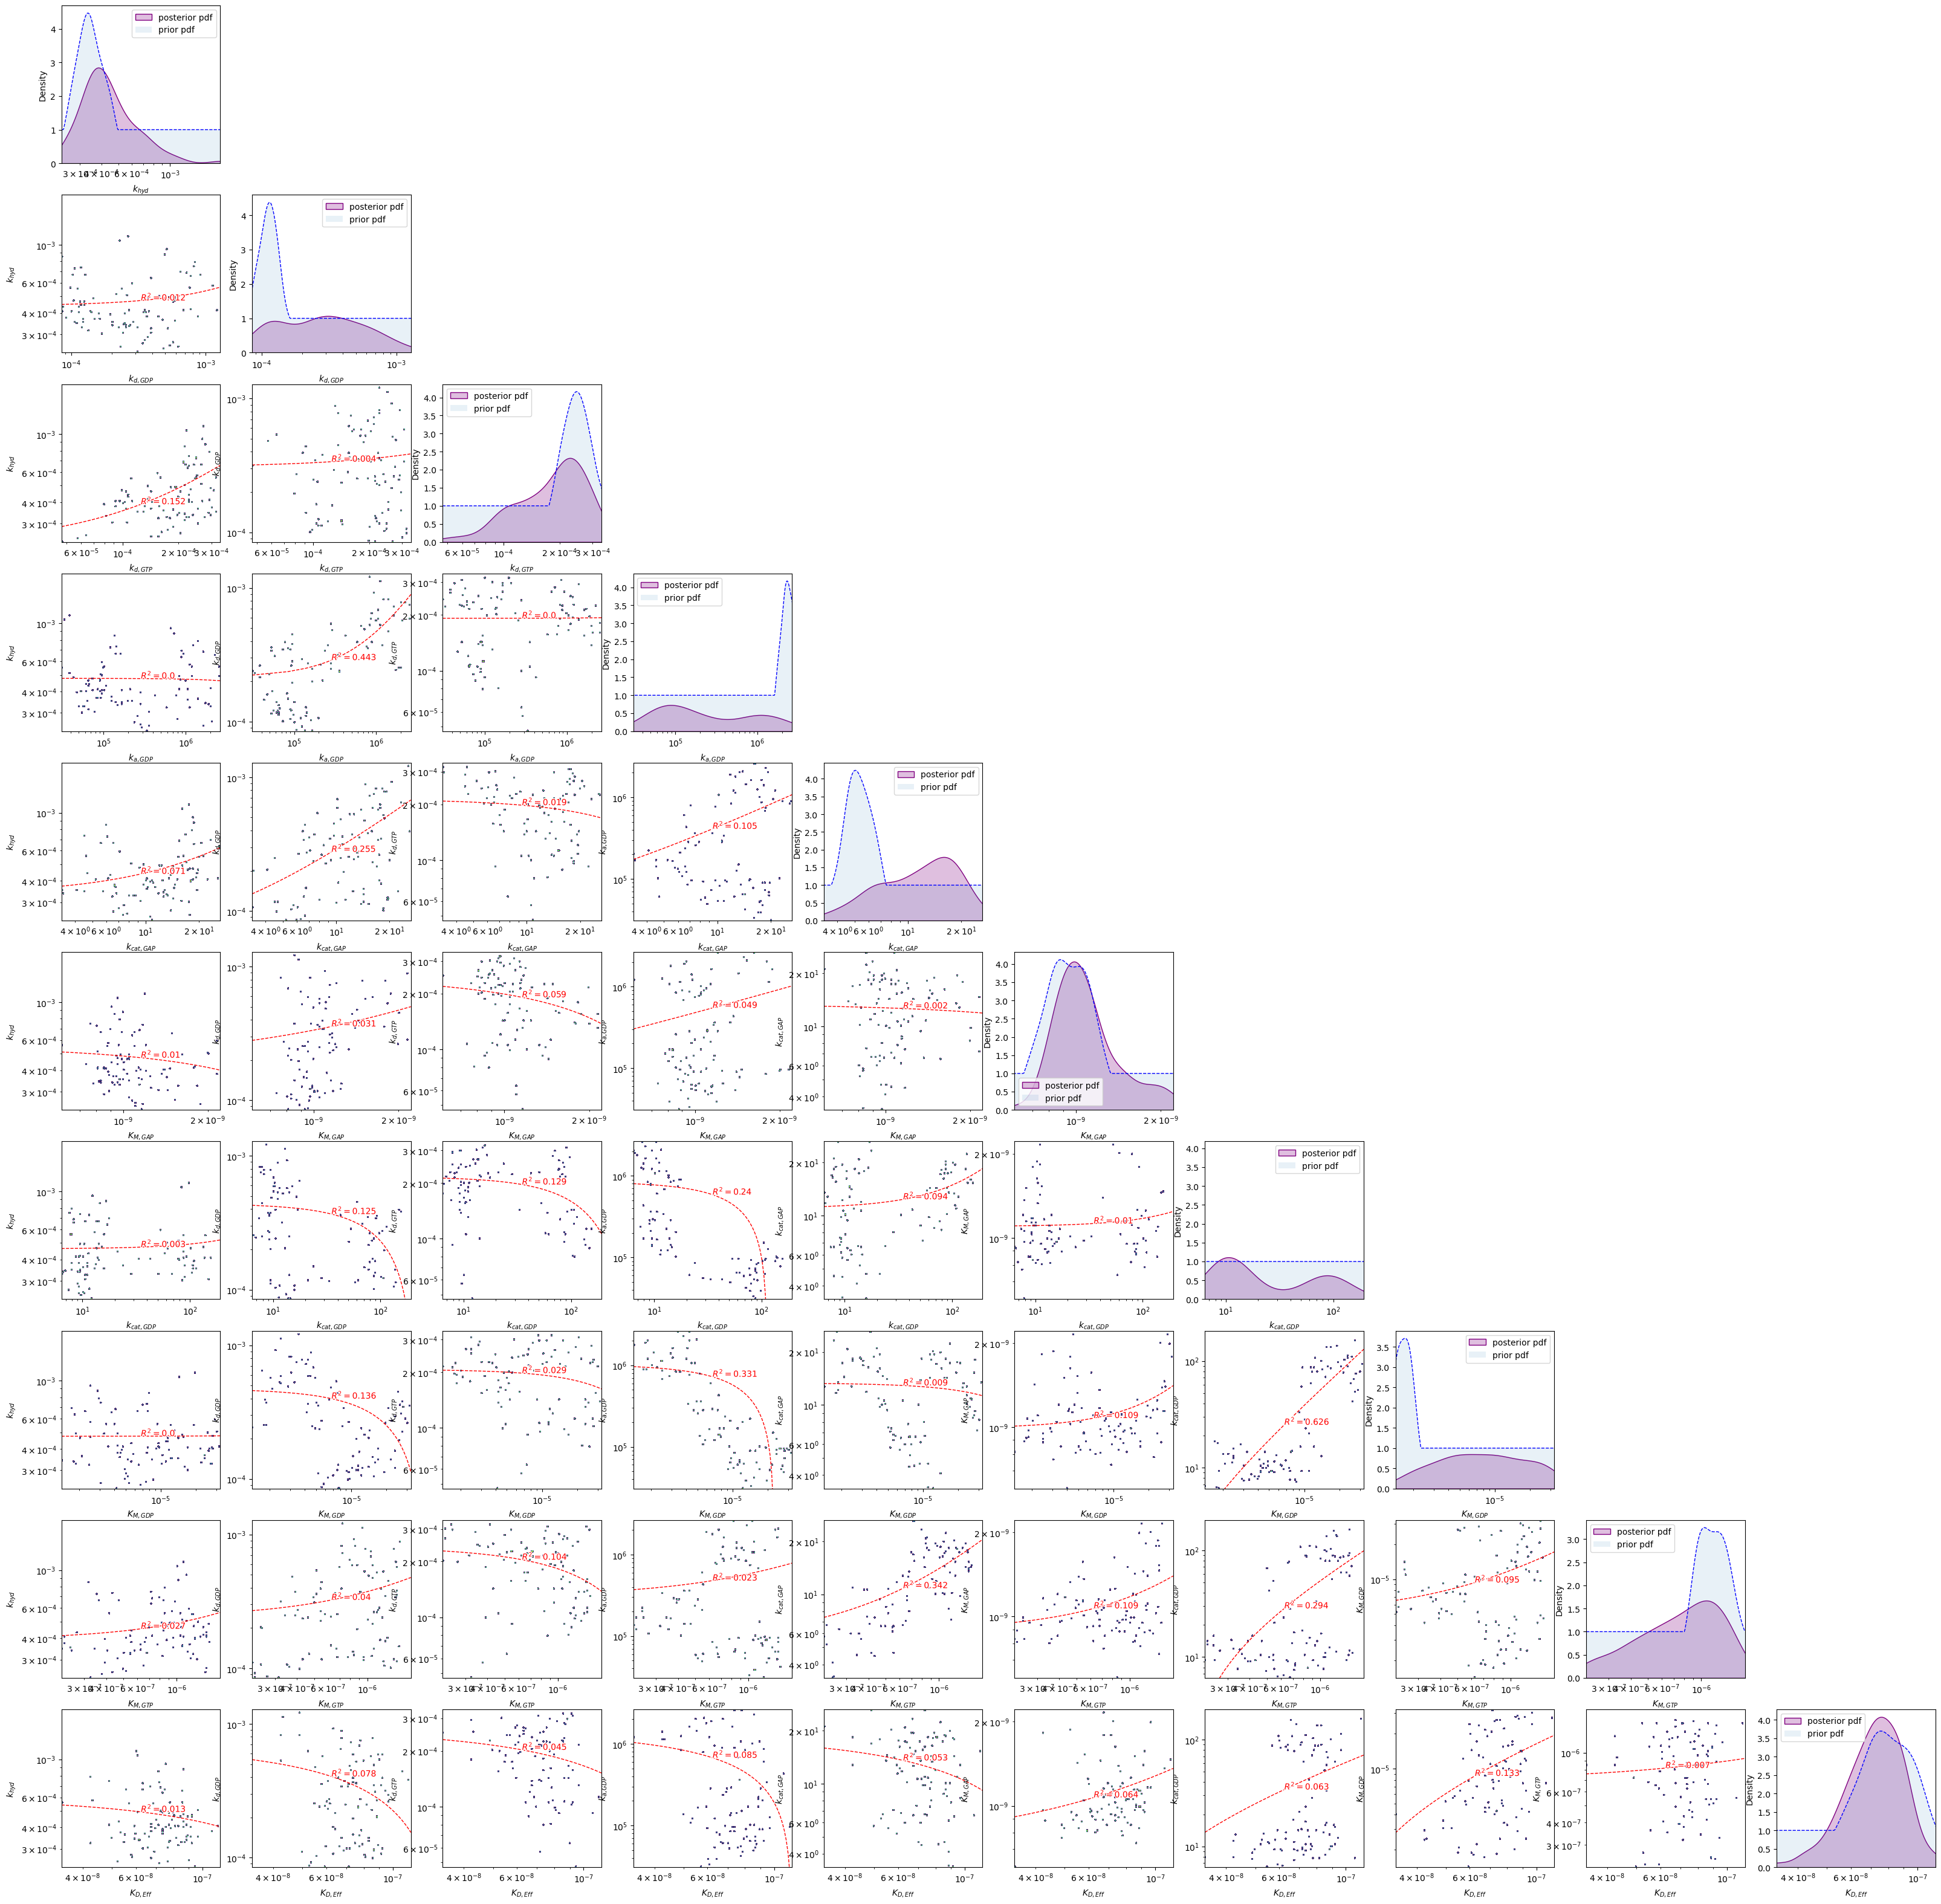

In [ ]:
MCMC_example.parameter_pairplot(include_prior=True)  # regression = False turns off regressionon graphs.

Next lets look at the rule value pairplot.

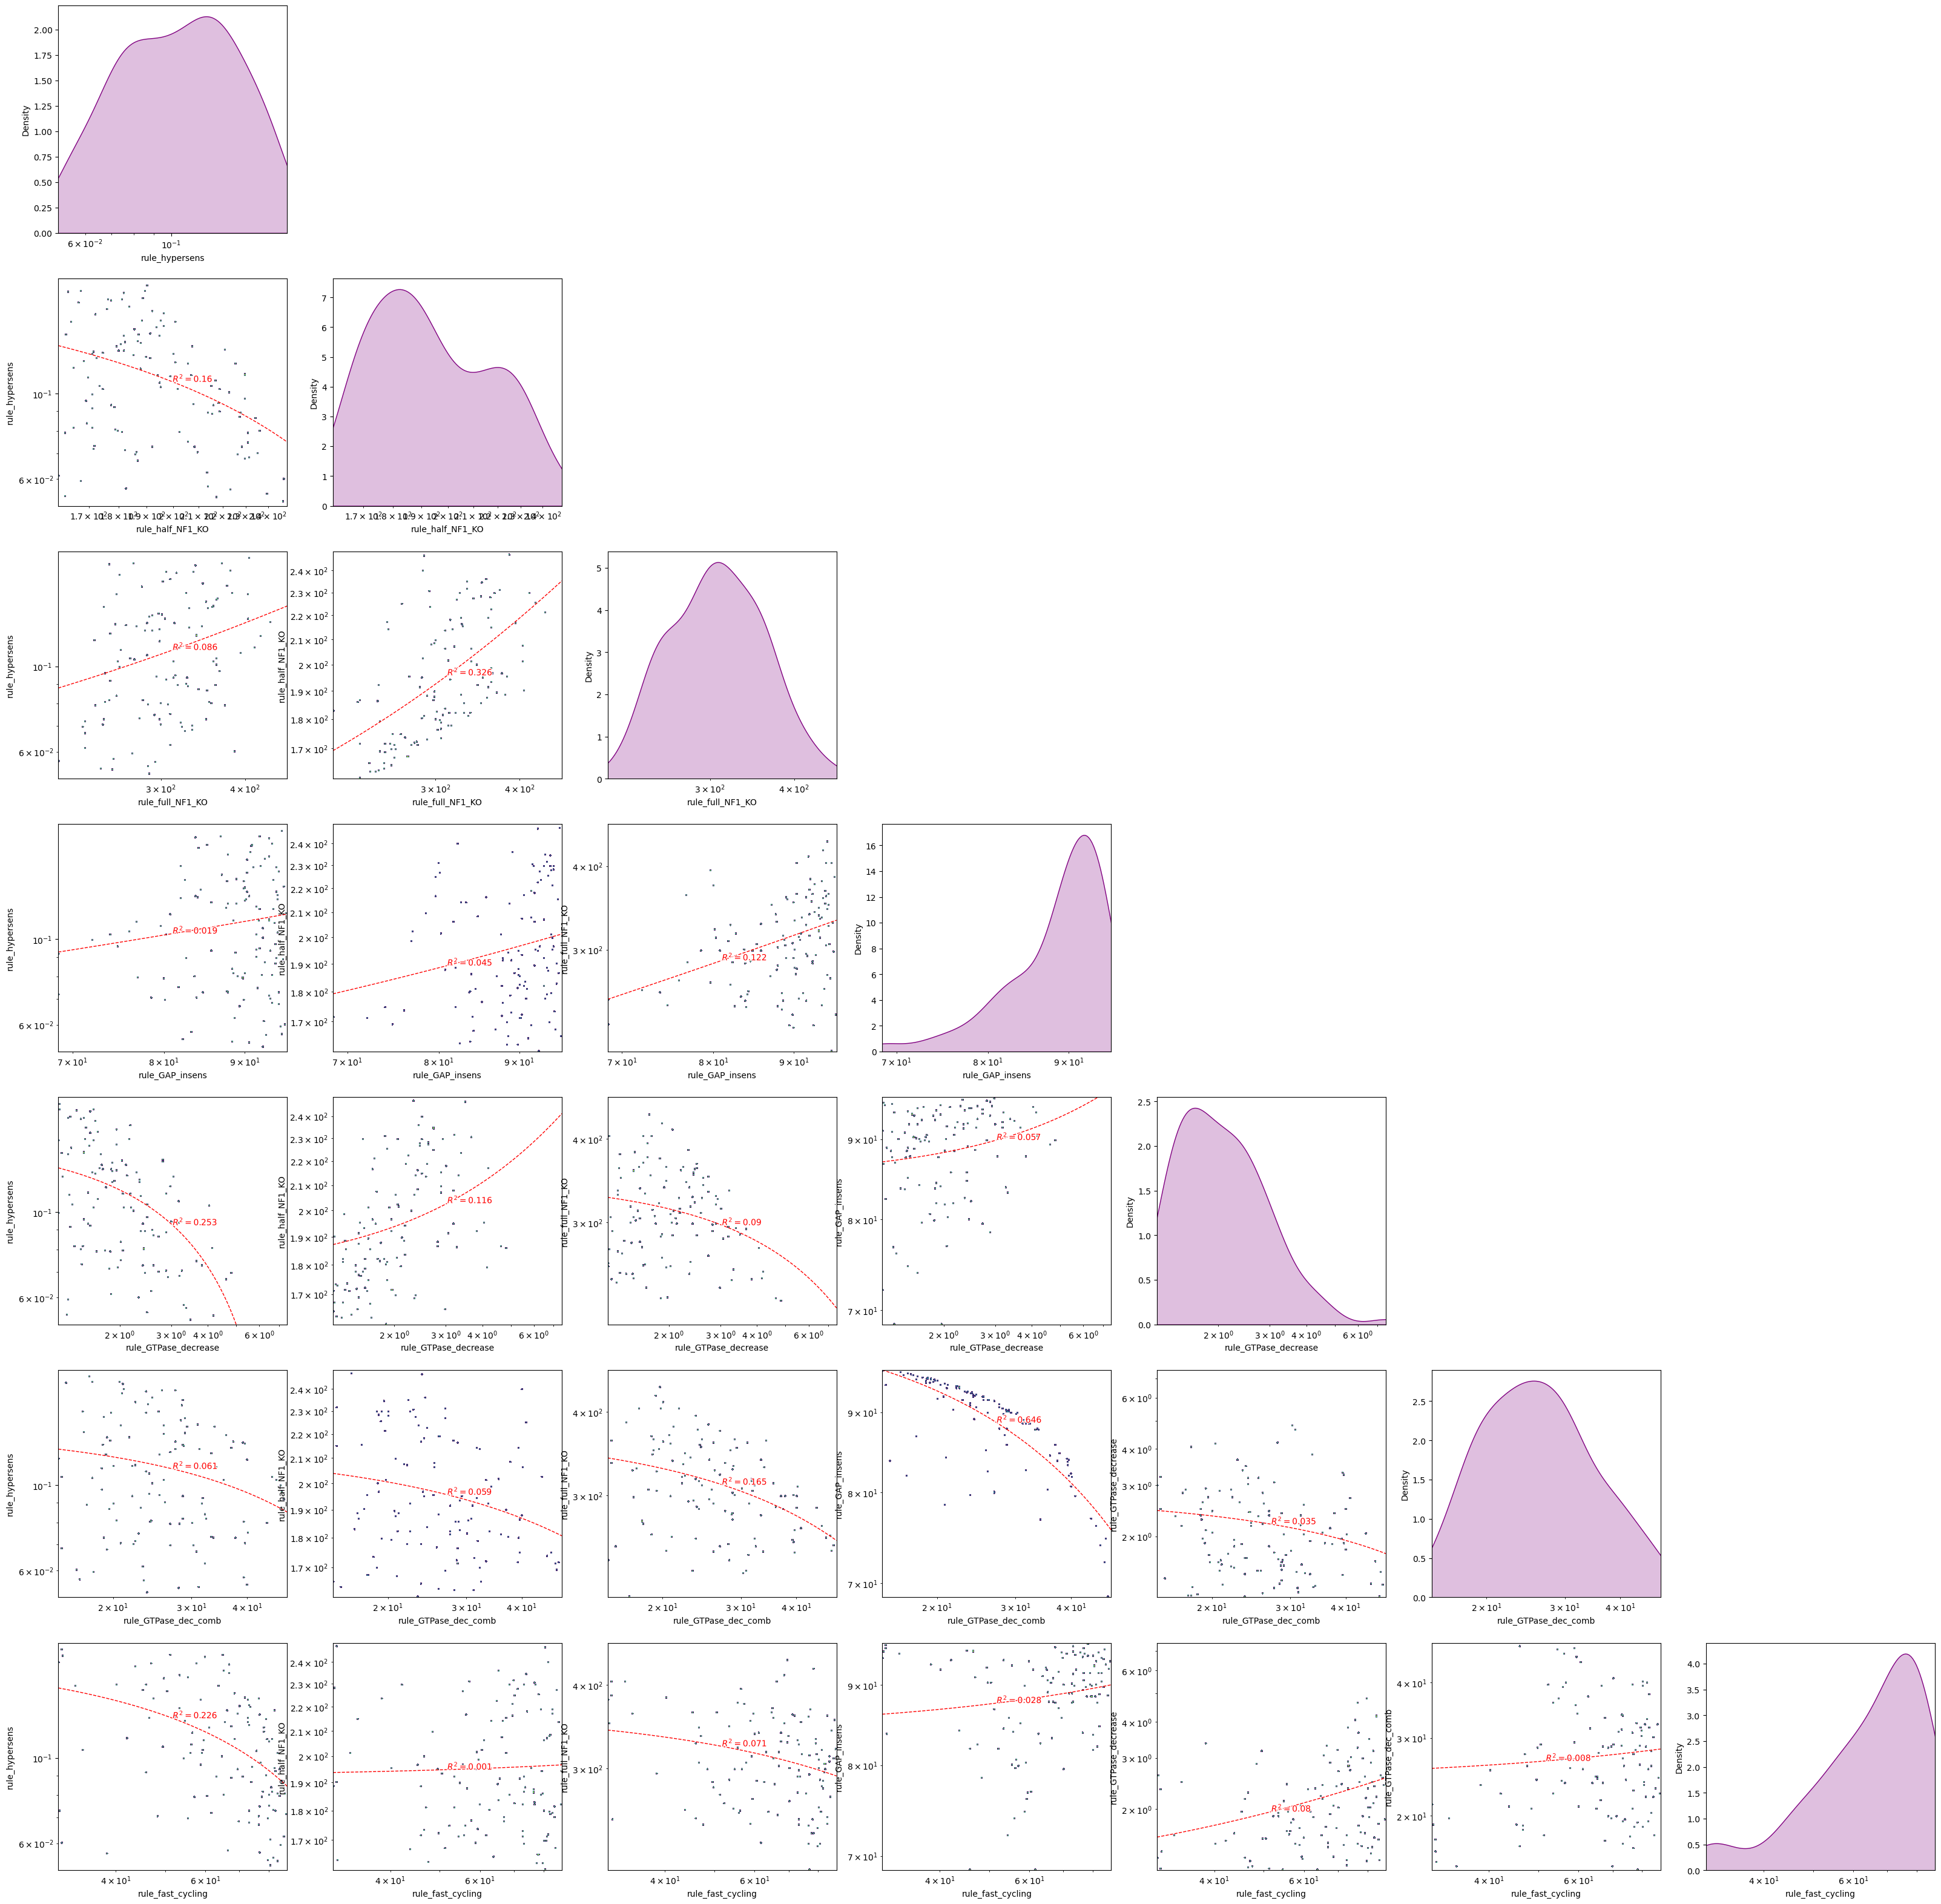

In [ ]:
MCMC_example.rule_pairplot(logscale=True)

We can even directly make the spider plots of each rule value vs. parameter. *WARNING! This may take some time.*

<Figure size 640x480 with 0 Axes>

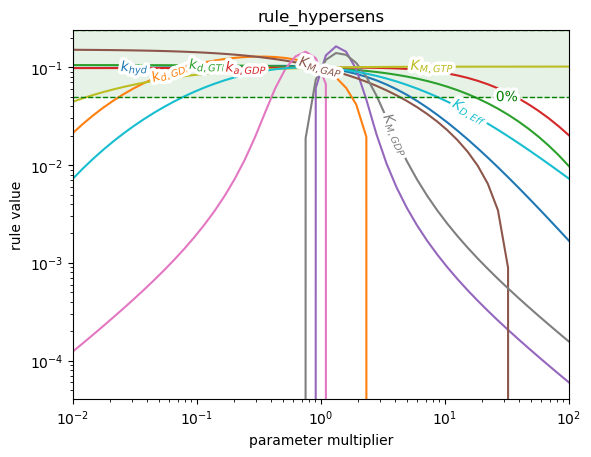

<Figure size 640x480 with 0 Axes>

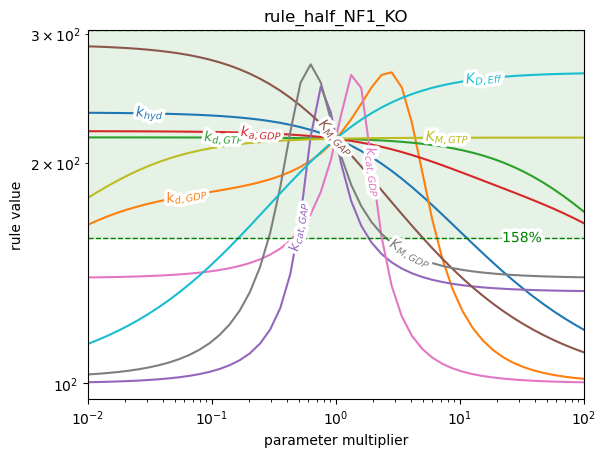

<Figure size 640x480 with 0 Axes>

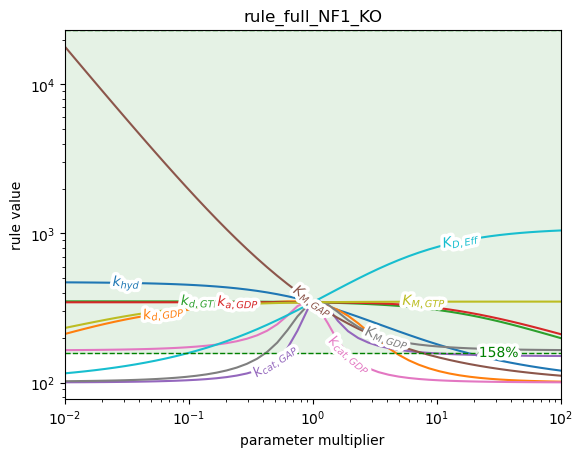

<Figure size 640x480 with 0 Axes>

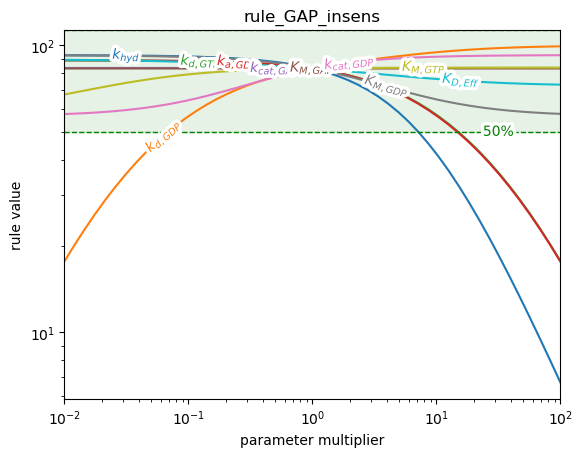

<Figure size 640x480 with 0 Axes>

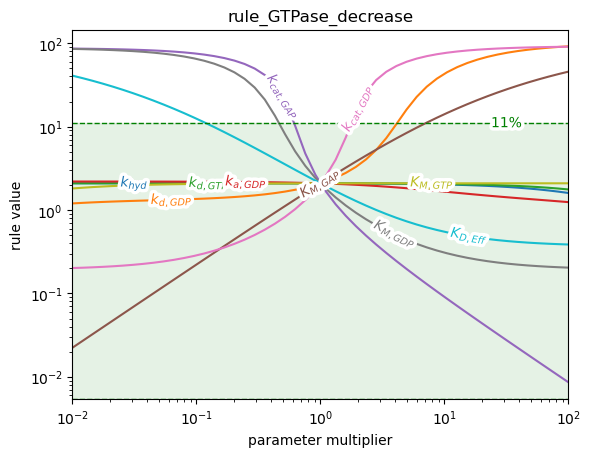

<Figure size 640x480 with 0 Axes>

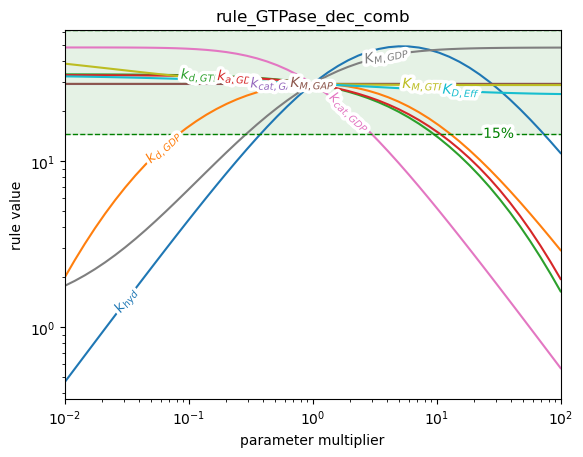

<Figure size 640x480 with 0 Axes>

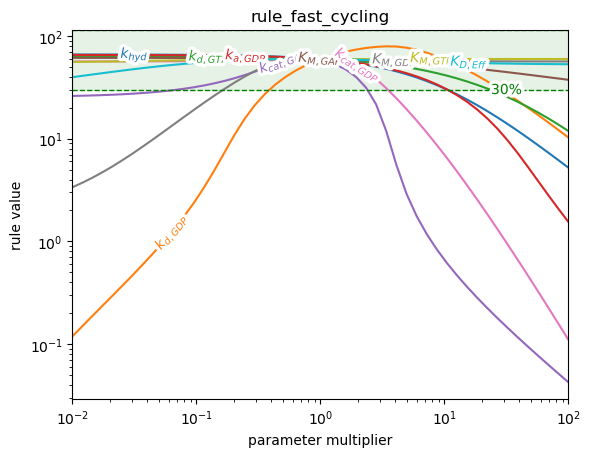

In [ ]:
MCMC_example.spider_plots(o_0)